# Analysis of example dataset with Python version of f-scLVM

In [1]:
import os
import fscLVM
import pdb
import h5py
import scipy as sp
from fscLVM import plotFactors, plotRelevance, plotLoadings, saveFA, dumpFA
%pylab inline

# specify where the expression data and gene sets files are
data_dir = 'extdata'
out_dir = 'extdata'

Populating the interactive namespace from numpy and matplotlib


## Loading raw expression data and gene sets

In [2]:
####
# Annotation file
annoFileMSigDB = os.path.join(data_dir,'reactome_subset.gmt') #REACTOME subset
annoDB   = 'REACTOME'

# dataFile: csv file with log expresison values
dataFile = os.path.join(data_dir, 'mesc.csv')

In [5]:
data = fscLVM.utils.load_txt(dataFile=dataFile, annoFiles=annoFileMSigDB, annoDBs=annoDB)

In [10]:
#print statistics for the loaded dataset
print ("Loaded {:d} cells, {:d} genes".format(data['Y'].shape[0],data['Y'].shape[1]))
print ("Annotation: {:d} terms".format(len(data['terms'])))

Loaded 182 cells, 196 genes
Annotation: 30 terms


In [6]:
data

{'I': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 'Y': array([[ 1.        ,  1.97562836,  1.09368974, ...,  2.24718223,
          1.1318887 ,  0.64564788],
        [ 1.        ,  0.80496081,  0.72473836, ...,  3.24174244,
          2.44347864,  0.98278187],
        [ 1.        ,  2.17964686,  2.70644831, ...,  0.        ,
          1.90543747,  2.03367569],
        ..., 
        [ 3.        ,  2.85302202,  0.        , ...,  1.2602093 ,
          0.        ,  0.        ],
        [ 3.        ,  0.37237619,  0.37237619, ...,  0.        ,
          0.        ,  0.        ],
        [ 3.        ,  0.        ,  1.53851131, ...,  0.94168378,
          0.94168378,  0.        ]]),
 'genes': ['Gnai3',
  'Cdc45',
  'Ccnd2',
  'Itgb2',
  'Raf1',
  'Kat2b',
  

In [9]:
data['Y'].shape

(182, 196)

## Initializing the f-scLVM model

In [11]:
#I: indicator matrix that assigns genes to pathways
I = data['I'] 
#Y: log expression values 
Y = data['Y']
#terms: ther names of the terms
terms = data['terms']

#initialize FA instance, here using a Gaussian noise model and fitting 5 dense hidden factors
FA = fscLVM.initFA(Y, terms, I, noise='gauss', nHidden=5, pruneGenes=True, minGenes=10)

## Model training

In [12]:
#model training
FA.train()

#print diagnostics
FA.printDiagnostics()

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
Converged after 701 iterations
('Maximally ', 0.0, '% Genes per factor changed.')


/Users/davis/anaconda/envs/py2.7/lib/python2.7/site-packages/fscLVM/utils.py:403: RuntimeWarning: invalid value encountered in divide
  y_max = SP.ceil(max(n_gain)/gap)
/Users/davis/anaconda/envs/py2.7/lib/python2.7/site-packages/fscLVM/utils.py:404: RuntimeWarning: invalid value encountered in double_scalars
  y_min = SP.floor(min(n_loss)/gap)


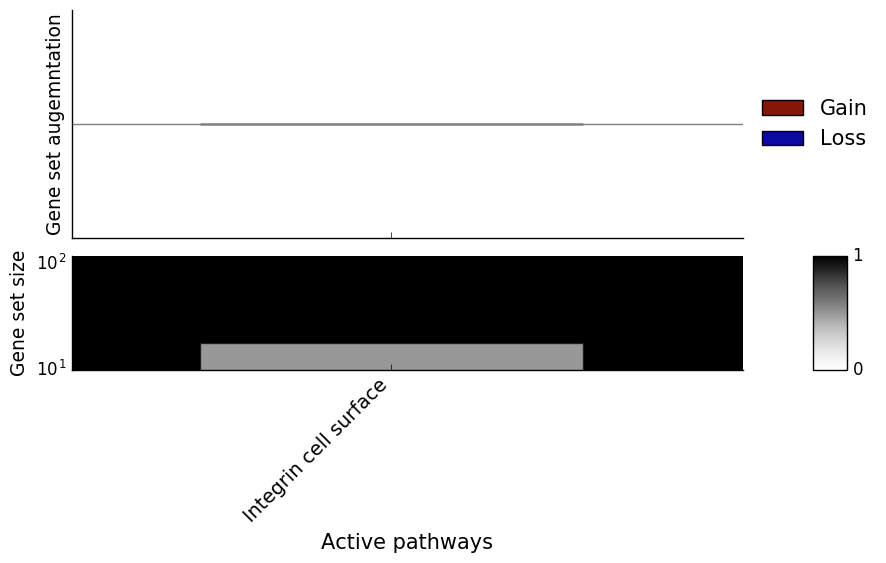

In [13]:
#plot results
fig = plotRelevance(FA)

IndexError: too many indices for array

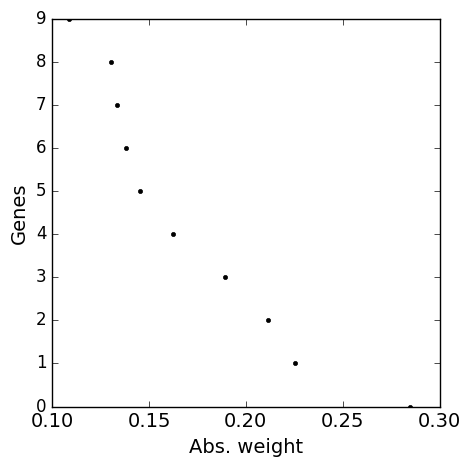

In [14]:
plotLoadings(FA, 'Integrin cell surface')

## Save results for comparison

In [17]:
out_file = os.path.join(out_dir,'slalom_example_data_python_fsclvm_results.h5')
saveFA(FA, out_name=out_file, saveF=False)

In [18]:
h = h5py.File(out_file)
for name in h:
    print name

I
W
X
Z
idx_genes
relevance
terms


In [22]:
FA.Z

In [23]:
for thing in FA.Z:
    thing

TypeError: 'CNodeZ' object is not iterable